# Forward Error Correction Channel Simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%store -r rx_buffer pad

In [2]:
hard_data = rx_buffer[::pad]

hard_binary = ''
for hd in hard_data:
    h_bin = '{0:08b}'.format(hd)
    hard_binary += h_bin[::-1] # Decoder accepts LSB first
    
print(hard_binary)

1000110101101000100100111110010110010011010000011101011000001000110001011001110000010001101100110010011111111001011010001111000101011110001110000001110110011011010100101110001001100010010000111101110110101101000010111000011101101111101101101000101110101111001111001011110111000101000101110010101100111111000000110100101101010001010011101010101001001011010111110101111110010000001001101010000000100000100101000011010001101101100010101000110000010010111100110010110011011110111010100010000011100011111000010000100110010100000001011011111001101001000010010011111111100010000111101100010011100110011111110111111101101000000101011010110101100011010000111101001111101001111100001010101011101110100011101100100010110101011111000011000010111111001101110101010110000011011110110011000001010111100111000111110011010001010011100100001111100010011011101001101010100010110100001001011110001011011001010110100000110110000110000100111011100000011000011111011010101001000111001000001101000101111010010111100011110100

<function matplotlib.pyplot.show(*args, **kw)>

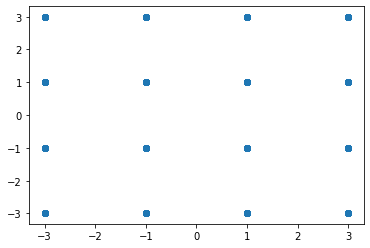

In [3]:
L = 4 # Symbol length - 16-QAM
    
mod_I = np.empty(0)
mod_Q = np.empty(0)
for i in range(0, len(hard_binary), L):
    symbol = hard_binary[i : i+L]
    
    b0b1 = symbol[0:2]
    b2b3 = symbol[2:4]

    if b0b1 == '00':
        I = -3
    elif b0b1 == '01':
        I = -1
    elif b0b1 == '11':
        I = 1
    elif b0b1 == '10':
        I = 3

    if b2b3 == '00':
        Q = -3
    elif b2b3 == '01':
        Q = -1
    elif b2b3 == '11':
        Q = 1
    elif b2b3 == '10':
        Q = 3
        
    mod_I = np.append(mod_I, I)
    mod_Q = np.append(mod_Q, Q)

plt.scatter(mod_I, mod_Q)
plt.show

Desired SNR: 20 dB
Var Signal:  10.169591836734694
Var Noise:  0.10169591836734694
SNR (ratio):  100.0
Measured SNR:  20.412384362658656


<function matplotlib.pyplot.show(*args, **kw)>

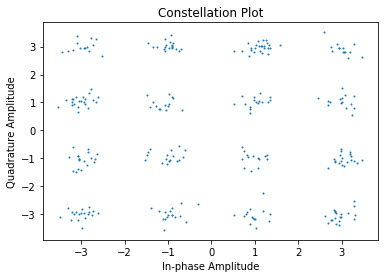

In [4]:
signal = mod_I + 1j*mod_Q

# Calculate nosie power
SNR = 20 # SNR dB
snr = 10**(SNR/10) # SNR ratio
var_signal = np.var(signal) # power
var_noise = var_signal / snr
print('Desired SNR: %d dB' % SNR)
print('Var Signal: ', var_signal)
print('Var Noise: ' ,var_noise)
print('SNR (ratio): ', var_signal/var_noise)

# Generate noise
noise_len = len(signal)
noise_mean = 0
noise = (np.random.normal(noise_mean,np.sqrt(2)/2,noise_len) 
         + 1j*np.random.normal(noise_mean,np.sqrt(2)/2,noise_len))
noise_scaled = noise * np.sqrt(var_noise)

# Add noise to signal
signal_with_noise = signal + noise_scaled

# Measure SNR to verify
power_signal = 10*np.log10(np.var(signal))
power_noise = 10*np.log10(np.mean(np.abs(signal - signal_with_noise)**2))
print('Measured SNR: ', power_signal - power_noise)

# Plot signal with noise
x = [n.real for n in signal_with_noise]
y = [n.imag for n in signal_with_noise]   

plt.scatter(x, y,s=1)
plt.ylabel('Quadrature Amplitude')
plt.xlabel('In-phase Amplitude')
plt.title('Constellation Plot')
plt.rcParams['figure.figsize'] = [3, 3]
plt.rcParams['figure.dpi'] = 300
plt.show

the LLR is (2 * r)/sigma^2 where r is the received symbol and sigma^2 is the noise power

In [5]:
llrs = []
for y in signal_with_noise:
    # Bit 0
    if y.real < -2:
        b0 = 2*(y.real+1)
    elif y.real >= -2 and y.real < 2:
        b0 = y.real
    elif y.real > 2:
        b0 = 2*(y.real-1)
        
    # Bit 1
    b1 = -abs(y.real)+2
    
    # Bit 2
    if y.imag < -2:
        b2 = 2*(y.imag+1)
    elif y.imag >= -2 and y.imag < 2:
        b2 = y.imag
    elif y.imag > 2:
        b2 = 2*(y.imag-1) 
        
    # Bit 3
    b3 = -abs(y.imag)+2
    
    llrs.append(b0)
    llrs.append(b1)
    llrs.append(b2)
    llrs.append(b3)

In [6]:
%store llrs

Stored 'llrs' (list)
